# Agriculture Project 
# Problem Statement- Model for Forecasting Production 5 year prediction

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Gathering Data

In [7]:
df = pd.read_csv('APY.csv')
df

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Kharif,2439.6,3415.0,1.40
1,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Rabi,1626.4,2277.0,1.40
2,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Autumn,4147.0,3060.0,0.74
3,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Summer,4147.0,2660.0,0.64
4,Andaman and Nicobar Island,NICOBARS,Arecanut,2009,Autumn,4153.0,3120.0,0.75
...,...,...,...,...,...,...,...,...
345331,West Bengal,PURULIA,Wheat,2015,Rabi,855.0,1241.0,1.45
345332,West Bengal,PURULIA,Wheat,2016,Rabi,1366.0,2415.0,1.77
345333,West Bengal,PURULIA,Wheat,2017,Rabi,1052.0,2145.0,2.04
345334,West Bengal,PURULIA,Wheat,2018,Rabi,833.0,2114.0,2.54


# Data Pre-Preprocessing

In [8]:
df.shape

(345336, 8)

In [13]:
df.head()

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Kharif,2439.6,3415.0,1.40
1,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Rabi,1626.4,2277.0,1.40
2,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Autumn,4147.0,3060.0,0.74
3,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Summer,4147.0,2660.0,0.64
4,Andaman and Nicobar Island,NICOBARS,Arecanut,2009,Autumn,4153.0,3120.0,0.75


In [9]:
df.head()

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Kharif,2439.6,3415.0,1.40
1,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Rabi,1626.4,2277.0,1.40
2,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Autumn,4147.0,3060.0,0.74
3,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Summer,4147.0,2660.0,0.64
4,Andaman and Nicobar Island,NICOBARS,Arecanut,2009,Autumn,4153.0,3120.0,0.75


In [14]:
df.sample(5)

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
61129,Bihar,SITAMARHI,Sugarcane,2009,Whole Year,2521.0,84827.0,33.65
16932,Andhra Pradesh,ANANTAPUR,Wheat,1999,Rabi,439.0,294.0,0.67
128617,Karnataka,UTTARA KANNADA,Jowar,2002,Summer,5.0,8.0,1.60
96124,Haryana,JIND,Cotton(lint),2004,Kharif,49970.0,148000.0,2.96
328948,Uttarakhand,PITHORAGARH,Other Cereals,2012,Rabi,243.0,120.0,0.49


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345336 entries, 0 to 345335
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   State       345336 non-null  object 
 1   District    345336 non-null  object 
 2   Crop        345327 non-null  object 
 3   Crop_Year   345336 non-null  int64  
 4   Season      345336 non-null  object 
 5   Area        345336 non-null  float64
 6   Production  340388 non-null  float64
 7   Yield       345336 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 21.1+ MB


In [16]:
df.isnull().sum()

State            0
District         0
Crop             9
Crop_Year        0
Season           0
Area             0
Production    4948
Yield            0
dtype: int64

In [17]:
# droping null values 
df.dropna(inplace=True)

In [18]:
df.isnull().sum()

State         0
District      0
Crop          0
Crop_Year     0
Season        0
Area          0
Production    0
Yield         0
dtype: int64

In [19]:
df.duplicated().sum()

0

In [20]:
df.describe()

,Crop_Year,Area,Production,Yield
count,340383.000000,3.403830e+05,3.403830e+05,340383.000000
mean,2008.884815,1.182641e+04,9.584867e+05,80.578840
std,6.574730,4.612680e+04,2.153083e+07,923.273309
min,1997.000000,8.000000e-03,0.000000e+00,0.000000
25%,2003.000000,8.000000e+01,8.700000e+01,0.570000
50%,2009.000000,5.630000e+02,7.180000e+02,1.030000
75%,2015.000000,4.258000e+03,7.182000e+03,2.500000
max,2020.000000,8.580100e+06,1.597800e+09,43958.330000


In [24]:
df.corr()['Production']

Crop_Year     0.004050
Area          0.048521
Production    1.000000
Yield         0.437400
Name: Production, dtype: float64

# EDA

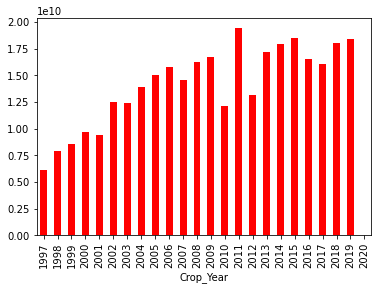

In [14]:
grouped_df = df.groupby(['Crop_Year'])
group_prod=grouped_df['Production'].sum()

group_prod.plot(kind='bar',color='red')
plt.show()

In [15]:
grouped_data = df.groupby(['Crop_Year','Crop'])
group_prod=grouped_data['Production'].sum()
group_prod.head()

Crop_Year  Crop     
1997       Arecanut      308584.0
           Arhar/Tur    1713966.0
           Bajra        7413318.0
           Banana       1612186.0
           Barley       1637528.0
Name: Production, dtype: float64

In [16]:
group_prod = group_prod.unstack('Crop')
group_prod.head()

Crop,Arecanut,Arhar/Tur,Bajra,Banana,Barley,Black pepper,Cardamom,Cashewnut,Castor seed,Coconut,...,Soyabean,Sugarcane,Sunflower,Sweet potato,Tapioca,Tobacco,Turmeric,Urad,Wheat,other oilseeds
Crop_Year,,,,,,,,,,,,,,,,,,,,,
1997,308584.0,1713966.0,7413318.0,1612186.0,1637528.0,56444.0,1221.0,74142.0,776659.0,5.643107e+09,...,5537713.0,201407054.0,233818.0,235719.0,2881590.0,401209.0,64984.0,785671.0,64704641.0,NaN
1998,799274.0,2631971.0,7066586.0,6261125.0,1517019.0,79449.0,7144.0,81498.0,837460.0,7.332635e+09,...,7106821.0,266986658.0,776030.0,276023.0,5596386.0,580389.0,202365.0,1160841.0,70678070.0,7731.0
1999,163905.0,2548362.0,5790675.0,5799103.0,1415660.0,63804.0,8528.0,103339.0,768428.0,7.975608e+09,...,6834358.0,301151204.0,540770.0,588124.0,6010718.0,552414.0,292641.0,1437136.0,75987742.0,NaN
2000,355415.0,2250868.0,6918314.0,6621168.0,1418426.0,79071.0,8916.0,139275.0,888974.0,9.096443e+09,...,5253274.0,296190249.0,616479.0,474245.0,6825440.0,702893.0,307660.0,1250692.0,69584998.0,436.0
2001,376514.0,2245522.0,8282554.0,4217203.0,1418042.0,80536.0,9084.0,127931.0,644482.0,8.839858e+09,...,5921466.0,296583374.0,665184.0,487471.0,2653607.0,726130.0,151595.0,1303678.0,72740604.0,126.0


In [17]:
df["Crop_Year"].unique() #Finding the Years of the data

array([2007, 2008, 2009, 2000, 2001, 2002, 2003, 2004, 2006, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2005, 1997, 1998,
       1999, 2020], dtype=int64)

In [18]:
df["Season"].nunique()

6

In [19]:
df["Season"].unique() #Finding the Seasons of the data

array(['Kharif     ', 'Rabi       ', 'Autumn     ', 'Summer     ',
       'Whole Year ', 'Winter     '], dtype=object)

In [20]:
df["Crop"].nunique()

55

In [21]:
no_of_diff_crops = df['Crop'].nunique()
types_of_crops = df['Crop'].unique()

print('There are {} different types of crops'.format(no_of_diff_crops))
print('------------------------------------')
print('They different types of crops are :-',types_of_crops)  #Finding the Crop of the data


There are 55 different types of crops
------------------------------------
They different types of crops are :- ['Arecanut' 'Arhar/Tur' 'Banana' 'Black pepper' 'Cashewnut' 'Coconut '
 'Cowpea(Lobia)' 'Dry chillies' 'Ginger' 'Groundnut' 'Maize'
 'Moong(Green Gram)' 'Oilseeds total' 'Other Kharif pulses'
 'other oilseeds' 'Rapeseed &Mustard' 'Rice' 'Sesamum' 'Sugarcane'
 'Sunflower' 'Sweet potato' 'Tapioca' 'Turmeric' 'Urad' 'Bajra'
 'Castor seed' 'Coriander' 'Cotton(lint)' 'Garlic' 'Gram' 'Guar seed'
 'Horse-gram' 'Jowar' 'Linseed' 'Masoor' 'Mesta' 'Niger seed' 'Onion'
 'Other  Rabi pulses' 'Potato' 'Ragi' 'Safflower' 'Small millets'
 'Soyabean' 'Tobacco' 'Wheat' 'Peas & beans (Pulses)' 'Jute' 'Barley'
 'Khesari' 'Sannhamp' 'Moth' 'Other Cereals' 'Cardamom'
 'Other Summer Pulses']


In [22]:
df["State"].nunique()

37

In [23]:
df["State"].unique() #Finding the State of the data

array(['Andaman and Nicobar Island', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'CHANDIGARH',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Daman and Diu', 'Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Laddak',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'THE DADRA AND NAGAR HAVELI',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

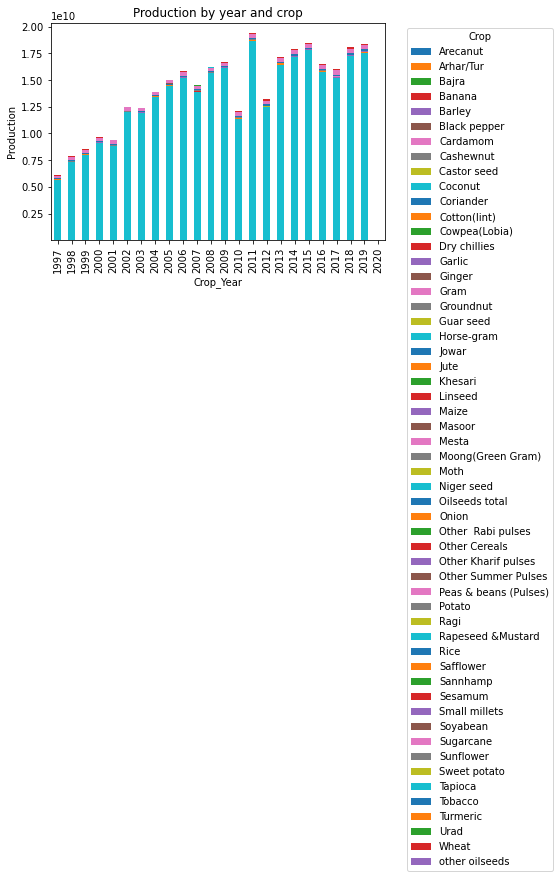

In [24]:
pl = group_prod.plot.bar(stacked=True)
pl.set_xlabel('Crop_Year')
pl.set_ylabel('Production')
pl.set_title('Production by year and crop')
pl.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

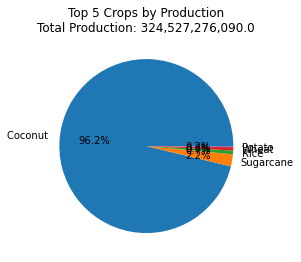

In [25]:
group_data = df.groupby('Crop')['Production'].sum()
sort_group = group_data.sort_values(ascending=False)
top_5_crops = sort_group.index[:5]
total_top_5_prod = sort_group.iloc[:10].sum()

plt.pie(group_data[top_5_crops], labels=top_5_crops, autopct='%1.1f%%')
plt.title(f'Top 5 Crops by Production\nTotal Production: {total_top_5_prod:,}')
plt.show()

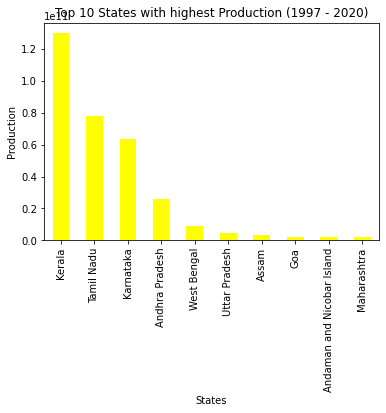

In [28]:
group_data = df.groupby('State')['Production'].sum()
group_data = group_data.sort_values(ascending=False)
group_data[0:10].plot(kind='bar',color='yellow')
plt.title('Top 10 States with highest Production (1997 - 2020)')
plt.xlabel('States')
plt.ylabel('Production')
plt.show()

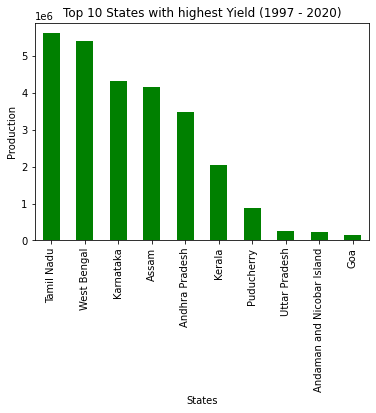

In [29]:
group_data = df.groupby('State')['Yield'].sum()
group_data = group_data.sort_values(ascending=False)
group_data[0:10].plot(kind='bar',color='green')
plt.title('Top 10 States with highest Yield (1997 - 2020)')
plt.xlabel('States')
plt.ylabel('Production')
plt.show()

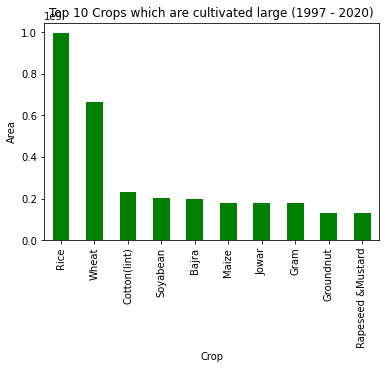

In [30]:
group_data = df.groupby('Crop')['Area '].sum()
group_data = group_data.sort_values(ascending=False)
group_data[0:10].plot(kind='bar',color='green')
plt.title('Top 10 Crops which are cultivated large (1997 - 2020)')
plt.xlabel('Crop')
plt.ylabel('Area')
plt.show()

In [31]:
df.columns

Index(['State', 'District ', 'Crop', 'Crop_Year', 'Season', 'Area ',
       'Production', 'Yield'],
      dtype='object')

In [32]:
df.loc[258831]

State           Tamil Nadu
District        COIMBATORE
Crop              Coconut 
Crop_Year             2007
Season         Whole Year 
Area              107106.0
Production    1597800000.0
Yield             14917.93
Name: 258831, dtype: object

In [33]:
df['Season'].value_counts() #Lets see the different seasons of tamil nadu

Kharif         135460
Rabi            99444
Whole Year      67039
Summer          21899
Winter           8192
Autumn           6884
Name: Season, dtype: int64

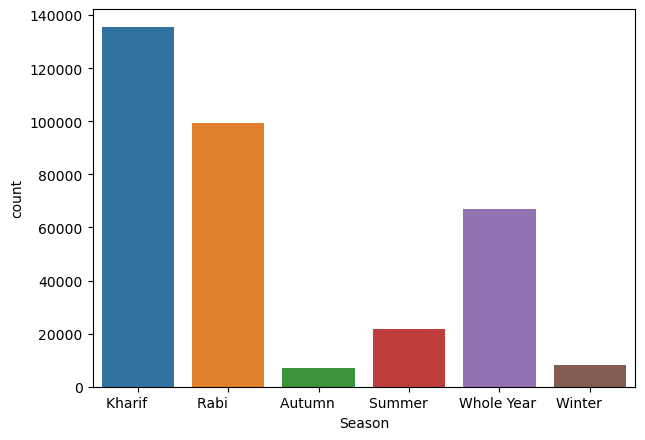

In [34]:
plt.figure(figsize=(7,5),dpi=100)
sns.countplot(data=df,x='Season');

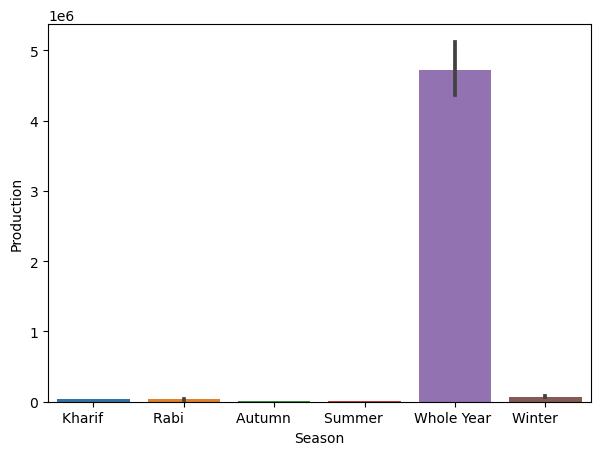

In [35]:
plt.figure(figsize=(7,5),dpi=100)
sns.barplot(data=df,x='Season',y='Production');

In [36]:
state_prod = df.groupby('State')['Production'].sum().reset_index().sort_values(by='Production',ascending=False)

In [37]:
state_prod

,State,Production
17,Kerala,1.297006e+11
31,Tamil Nadu,7.805176e+10
16,Karnataka,6.377280e+10
1,Andhra Pradesh,2.607622e+10
36,West Bengal,8.941179e+09
34,Uttar Pradesh,4.442585e+09
3,Assam,3.637715e+09
10,Goa,2.193998e+09
0,Andaman and Nicobar Island,2.053350e+09
20,Maharashtra,1.878565e+09


In [38]:
df.groupby('State').sum()['Production'].nlargest()#Let's see the top 5 states with most production over the years

State
Kerala            1.297006e+11
Tamil Nadu        7.805176e+10
Karnataka         6.377280e+10
Andhra Pradesh    2.607622e+10
West Bengal       8.941179e+09
Name: Production, dtype: float64

In [39]:
df.groupby("State").sum()['Production'].nsmallest()

State
Daman and Diu                   59268.0
CHANDIGARH                      89782.0
Laddak                         114584.0
Dadra and Nagar Haveli         337093.0
THE DADRA AND NAGAR HAVELI    2222055.0
Name: Production, dtype: float64

In [40]:
df.groupby('Crop').sum()['Production'].nlargest()

Crop
Coconut      3.108048e+11
Sugarcane    7.249507e+09
Rice         2.236428e+09
Wheat        2.007360e+09
Potato       6.323157e+08
Name: Production, dtype: float64

In [41]:
df.groupby('Crop').sum()['Production'].nsmallest()

Crop
Other Summer Pulses       8394.0
Cardamom                255497.0
Sannhamp                433530.0
Cowpea(Lobia)           745568.0
Other Cereals          1682056.0
Name: Production, dtype: float64

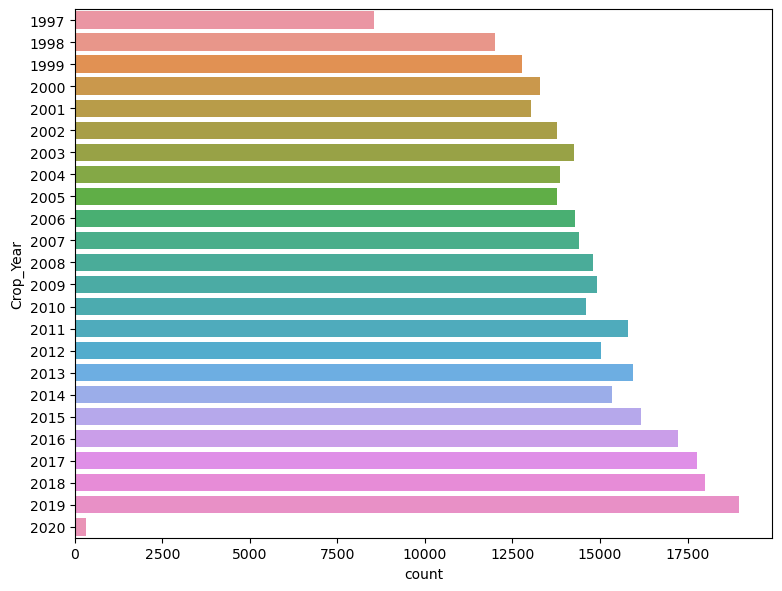

In [42]:
plt.figure(figsize=(9,7),dpi=100)
sns.countplot(data=df,y='Crop_Year'); 

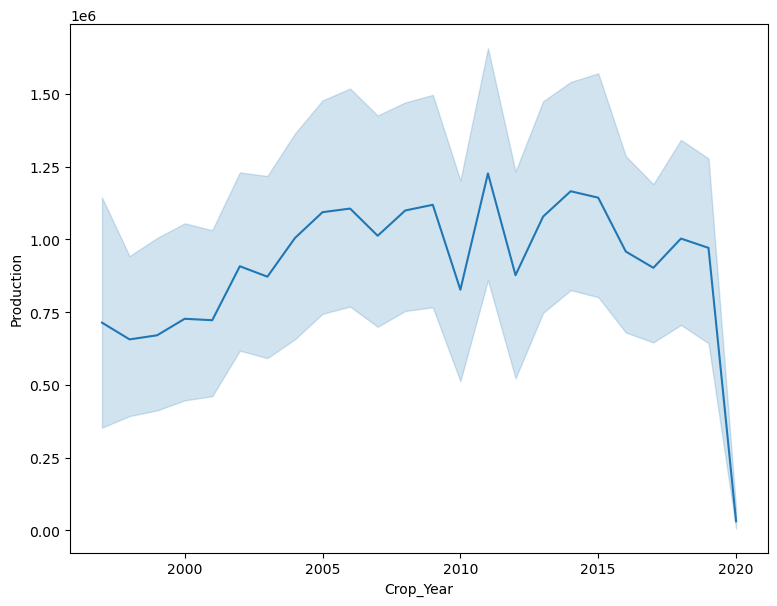

In [43]:
plt.figure(figsize=(9,7),dpi=100)
sns.lineplot(data=df,x='Crop_Year',y='Production');

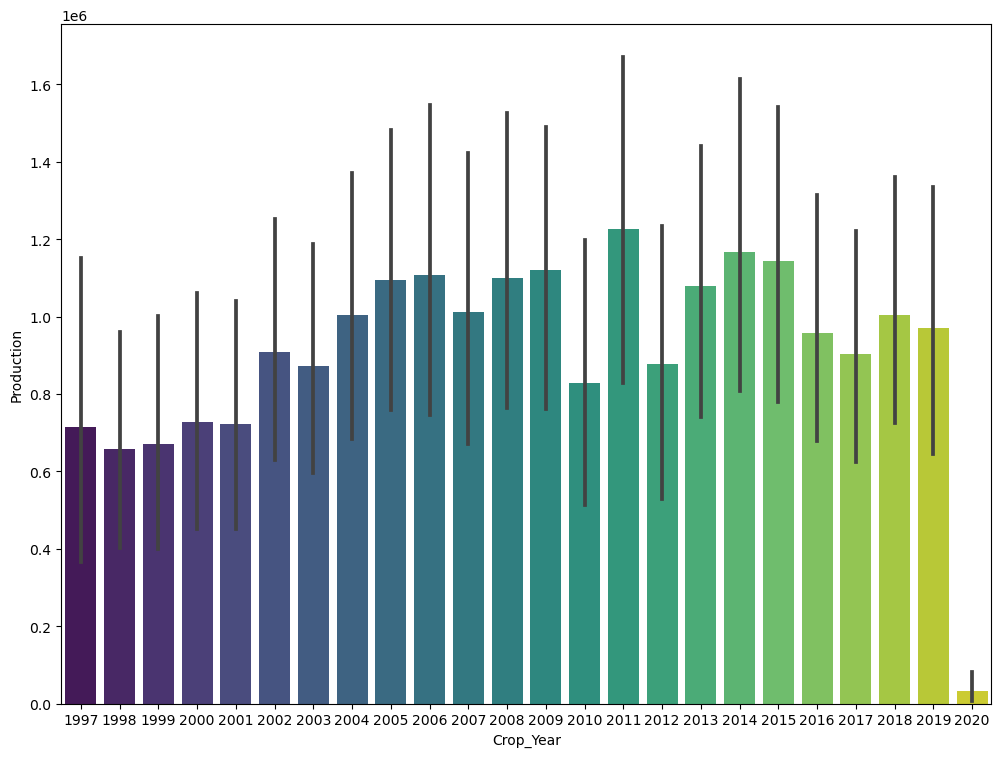

In [44]:
plt.figure(figsize=(12,9),dpi=100)
sns.barplot(data=df,x='Crop_Year',y='Production',palette='viridis');

In [45]:
df.groupby('Season').sum()['Production'].nlargest()

Season
Whole Year     3.165636e+11
Kharif         5.622335e+09
Rabi           3.150455e+09
Winter         5.877505e+08
Summer         2.437629e+08
Name: Production, dtype: float64

In [46]:
df['Crop'].value_counts()

Rice                     21566
Maize                    20267
Moong(Green Gram)        14713
Urad                     14296
Sesamum                  12541
Groundnut                12470
Wheat                    11204
Rapeseed &Mustard        10873
Sugarcane                10812
Arhar/Tur                10737
Potato                   10725
Onion                    10616
Gram                     10286
Jowar                     9653
Dry chillies              8868
Bajra                     8063
Peas & beans (Pulses)     7147
Sunflower                 7077
Small millets             6815
Cotton(lint)              6284
Masoor                    6267
Barley                    5769
Linseed                   5758
Ragi                      5679
Sweet potato              5645
Other Kharif pulses       5562
Turmeric                  5561
Horse-gram                5265
Garlic                    5192
Coriander                 4950
Soyabean                  4947
Other  Rabi pulses        4694
Castor s

In [47]:
india_top_prod = df.groupby('Crop').sum()['Production'].nlargest(55).reset_index()
india_top_prod

,Crop,Production
0,Coconut,3.108048e+11
1,Sugarcane,7.249507e+09
2,Rice,2.236428e+09
3,Wheat,2.007360e+09
4,Potato,6.323157e+08
5,Cotton(lint),4.839080e+08
6,Maize,4.440007e+08
7,Jute,2.304238e+08
8,Banana,2.267633e+08
9,Soyabean,2.117965e+08


<AxesSubplot:xlabel='Production', ylabel='Crop'>

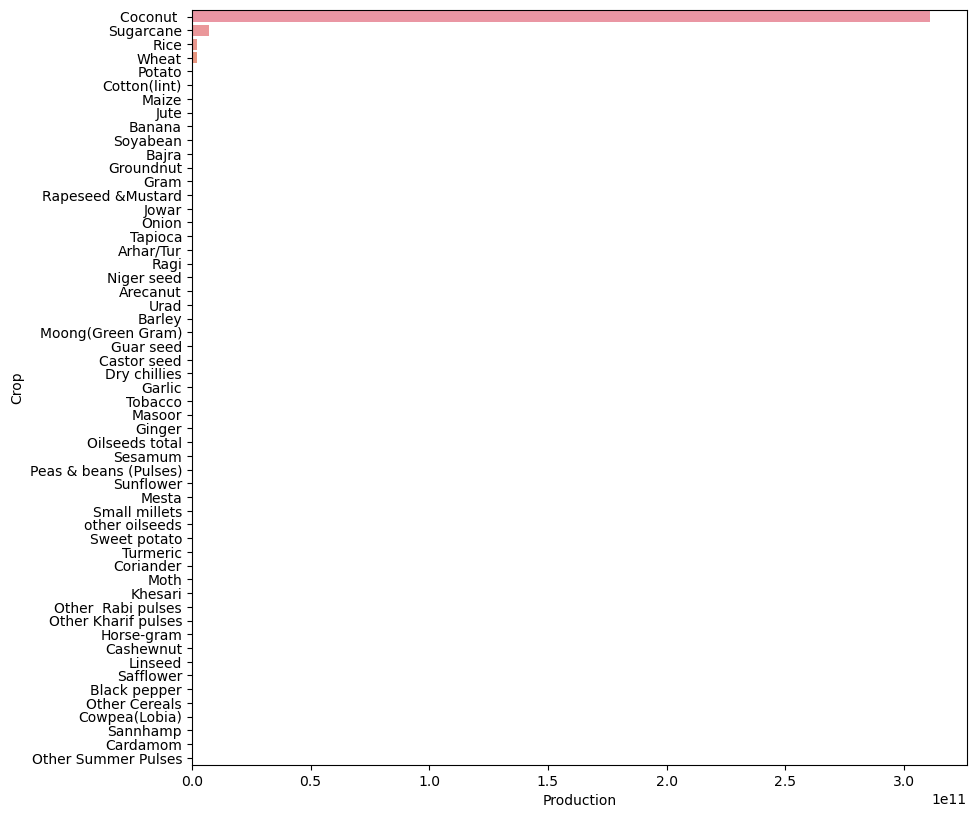

In [48]:
plt.figure(figsize=(10,10),dpi=100)
sns.barplot(data=india_top_prod,x='Production',y='Crop')

In [49]:
india_low_prod = df.groupby('Crop').sum()['Production'].nsmallest(55).reset_index()
india_low_prod

,Crop,Production
0,Other Summer Pulses,8.394000e+03
1,Cardamom,2.554970e+05
2,Sannhamp,4.335300e+05
3,Cowpea(Lobia),7.455680e+05
4,Other Cereals,1.682056e+06
5,Black pepper,2.097317e+06
6,Safflower,3.241790e+06
7,Linseed,3.298069e+06
8,Cashewnut,3.740786e+06
9,Horse-gram,5.276790e+06


In [50]:
coconut_prod = df[df['Crop'] == 'Coconut ']

In [51]:
coconut_prod

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
207,Andaman and Nicobar Island,NICOBARS,Coconut,2007,Whole Year,21636.0,80640000.0,3727.12
208,Andaman and Nicobar Island,NICOBARS,Coconut,2008,Whole Year,43380.0,81900000.0,1887.97
209,Andaman and Nicobar Island,NICOBARS,Coconut,2009,Whole Year,43520.0,84970000.0,1952.44
210,Andaman and Nicobar Island,NICOBARS,Coconut,2000,Whole Year,18168.0,65100000.0,3583.22
211,Andaman and Nicobar Island,NICOBARS,Coconut,2001,Whole Year,18190.0,64430000.0,3542.06
...,...,...,...,...,...,...,...,...
333865,West Bengal,PURULIA,Coconut,2015,Whole Year,65.0,723000.0,11123.08
333866,West Bengal,PURULIA,Coconut,2016,Whole Year,65.0,754900.0,11613.85
333867,West Bengal,PURULIA,Coconut,2017,Whole Year,68.0,785500.0,11551.47
333868,West Bengal,PURULIA,Coconut,2018,Whole Year,75.0,857500.0,11433.33


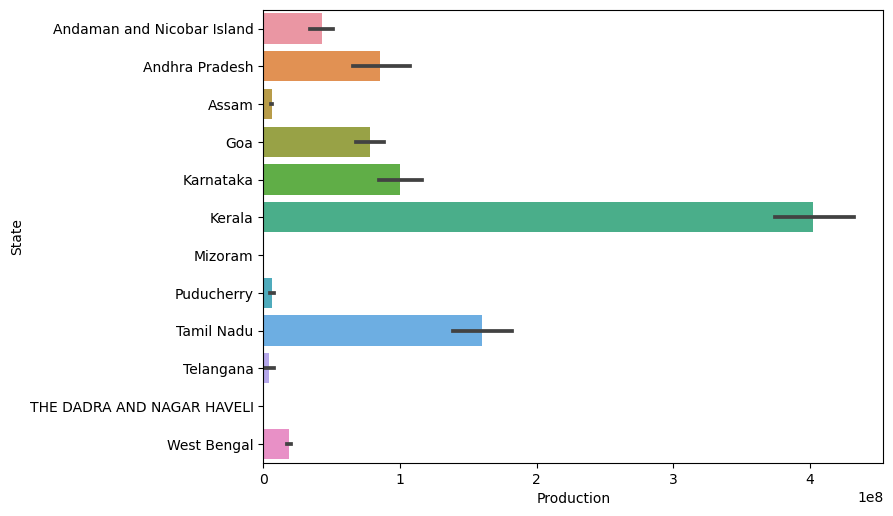

In [52]:
plt.figure(figsize=(8,6),dpi=100)
sns.barplot(data=coconut_prod,x='Production',y='State');

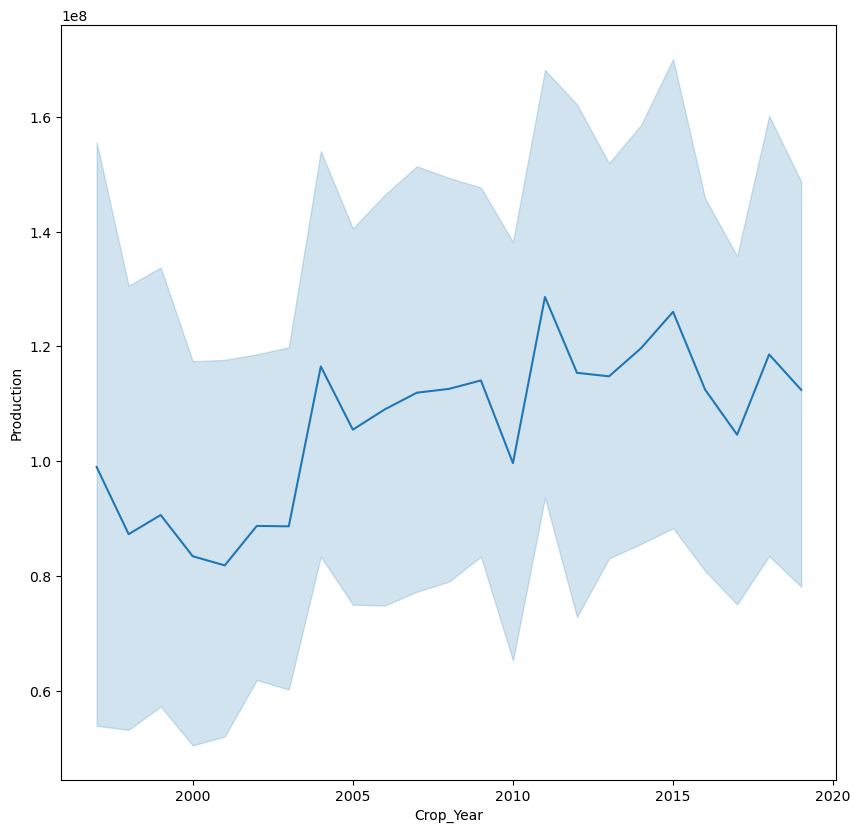

In [53]:
plt.figure(figsize=(10,10),dpi=100)
sns.lineplot(data=coconut_prod,x='Crop_Year',y='Production');

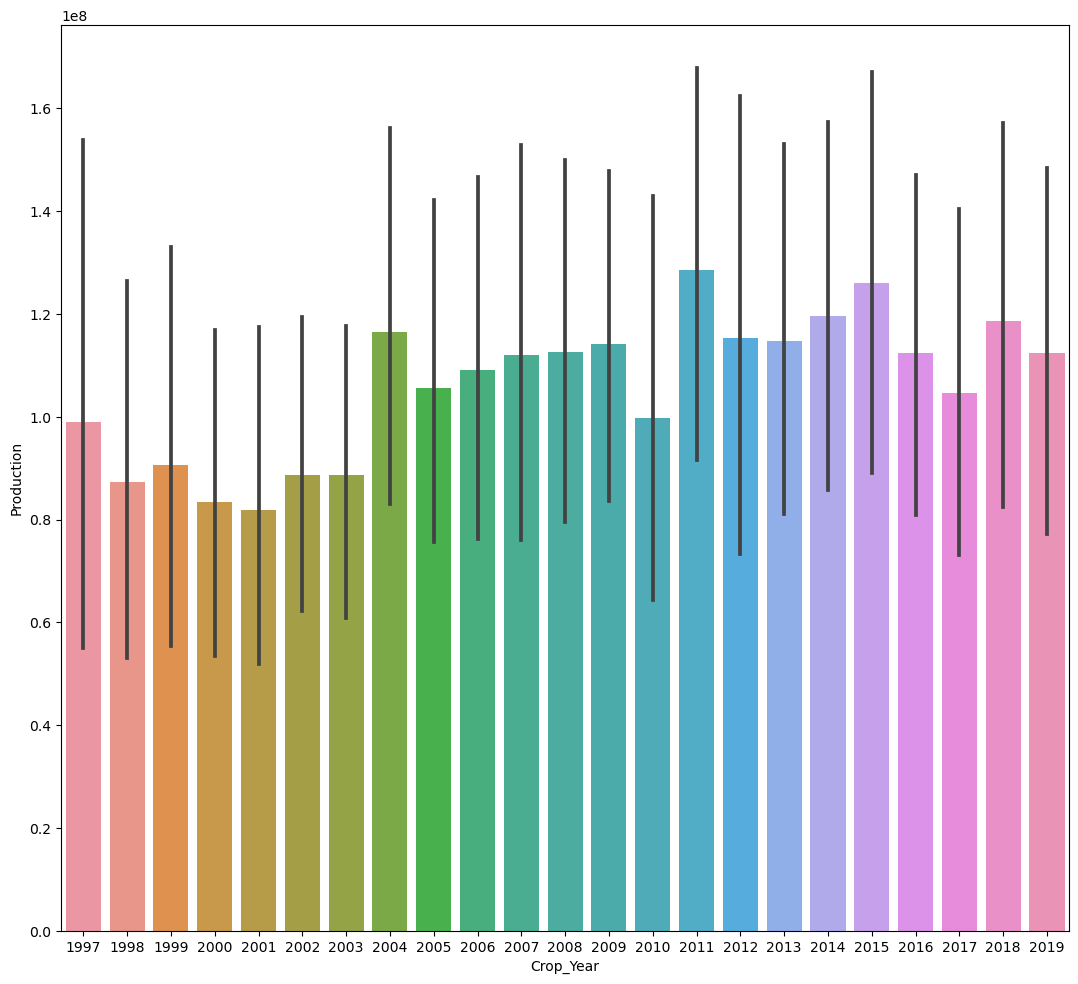

In [54]:
plt.figure(figsize=(13,12),dpi=100)
sns.barplot(data=coconut_prod,x='Crop_Year',y='Production');

In [55]:
coconut_prod.groupby('Season').sum()['Production'].nlargest()

Season
Whole Year     3.108043e+11
Kharif         4.923400e+05
Name: Production, dtype: float64

In [56]:
coconut_season = coconut_prod.groupby('Season').sum()['Production'].reset_index()

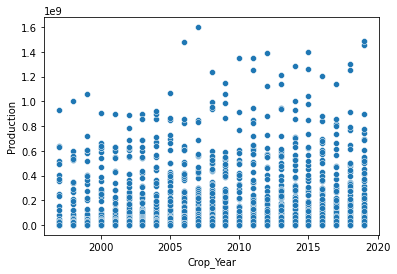

In [57]:
sns.scatterplot(data=coconut_prod,x='Crop_Year',y='Production');

# Model Training, Evalation, selection, development 

In [59]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

group_data = df.groupby('Crop_Year')['Production'].sum()
X_train = group_data.values[:-5]
X_test = group_data.values[-5:]

model = ARIMA(X_train, order=(1,1, 1))
model_fit= model.fit()

pred = model_fit.forecast(steps=5)

mae = mean_absolute_error(X_test,pred)
mae

4530257629.966684

In [60]:
X_train = group_data.values
model = ARIMA(X_train, order=(1,1, 1))
model_fit= model.fit()

pred = model_fit.forecast(steps=5)
pred

array([1.08467739e+10, 6.87894425e+09, 8.33176867e+09, 7.79981570e+09,
       7.99459076e+09])

In [62]:
group_data = df.groupby('Crop_Year')['Yield'].sum()
X_train = group_data.values[:-5]
X_test = group_data.values[-5:]

model = ARIMA(X_train, order = (2,1,2))
model_fit = model.fit()

pred = model_fit.forecast(steps=5)

mae= mean_absolute_error(X_test,pred)
mae

406986.4356110321

In [63]:
X_train = group_data.values
model = ARIMA(X_train, order=(2,1,2))
model_fit = model.fit()

pred = model_fit.forecast(steps=5)
pred

array([1121371.63507502,  194101.73102582,   -6219.9832294 ,
         27902.24038385,   45805.88046464])